<a href="https://colab.research.google.com/github/Amulya-Anurag/Amulya/blob/master/StockPrediction_of_Apple_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import relevent libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Fetch the Apple stock data from 2010-01 to 2020-06
start_date = '2010-01-01'
end_date = '2020-06-30'
stock = data.DataReader('AAPL', 'yahoo', start_date, end_date)
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.466835
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.512596
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.090879
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.042646
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.215786


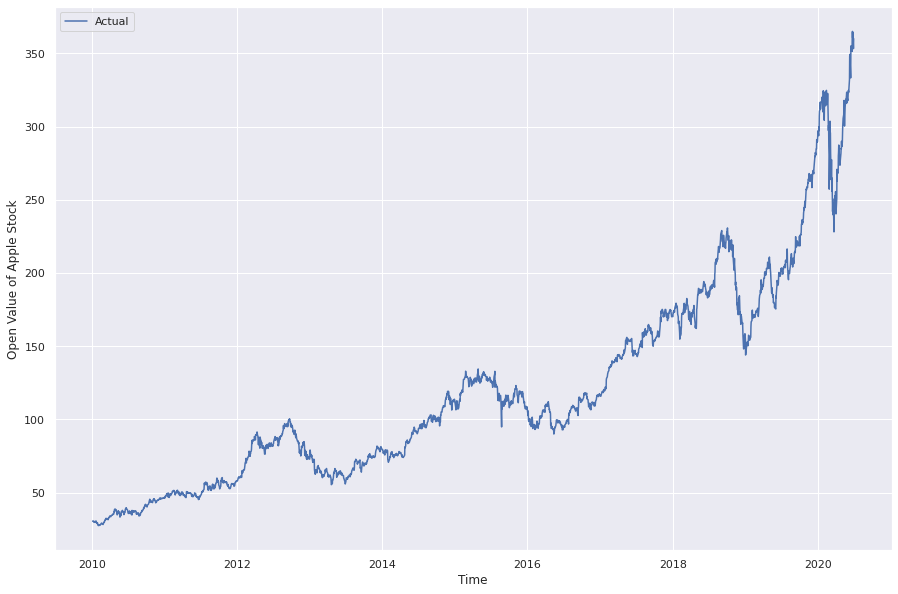

In [3]:
plt.figure( figsize=(15,10))
plt.plot(stock.Open)
plt.legend(['Actual'],loc= 'upper left')
plt.xlabel('Time')
plt.ylabel("Open Value of Apple Stock")
plt.show()

In [4]:
# Include stock information upto 2019 into train dataset 
train_set=stock[stock.index<'2019-12-31']
# Not including Adj Close in learning process
train=train_set.drop(['Adj Close'],axis=1)

In [5]:
#Use Min-Max scaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled= scaler.fit_transform(train)
train_scaled[0:10]

array([[0.00993667, 0.01211547, 0.01141173, 0.01187932, 0.24422195],
       [0.01052213, 0.01259177, 0.01204571, 0.01207947, 0.30315535],
       [0.01032877, 0.0112231 , 0.0119265 , 0.01023482, 0.27605459],
       [0.00859388, 0.0102924 , 0.01050139, 0.01002385, 0.23517921],
       [0.00859388, 0.01029788, 0.00971568, 0.01078119, 0.21909662],
       [0.009131  , 0.00996392, 0.01107035, 0.00976961, 0.22706088],
       [0.00739611, 0.00885256, 0.00911421, 0.00847673, 0.29909923],
       [0.00801916, 0.00758243, 0.00839895, 0.01006172, 0.30532756],
       [0.00776672, 0.01027598, 0.00961273, 0.00940176, 0.21107897],
       [0.00837903, 0.00855145, 0.01005706, 0.00750842, 0.29888567]])

In [6]:
#xtrain will be 5 dimensional data and ytrain will be 'Open' column from stock information

xtrain = []
ytrain = []

#Creating a datset with 60 days timesteps

for i in range(60, len(train_scaled)):
  xtrain.append(train_scaled[i-60:i])
  ytrain.append(train_scaled[i, 2]) # 2 is here to select 'Open' column

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

#Lets Check the Shape of xtrain
xtrain.shape

(2455, 60, 5)

In [7]:
# Choose libraries for model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [8]:
#Create a LSTM model with 4 LSTM layer and Apply Dropout of 20% and lastly a Dense layer with 1 neuron

RNN = Sequential([ 
                            LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1], 5)),
                            Dropout(0.20),

                            LSTM(units=50, return_sequences=True),
                            Dropout(0.20),

                           LSTM(units=50, return_sequences=True),
                           Dropout(0.20),

                           LSTM(units=50),
                           Dropout(0.20),
                           
                           Dense(units=1)
                          ])

Compile and Fit the Model

In [9]:
RNN.compile(optimizer='adam', loss='mean_squared_error')

RNN.fit(x=xtrain, y=ytrain , epochs=20, batch_size=1)


Epoch 1/20
2455/2455 [==============================] - 136s 55ms/step - loss: 0.0042
Epoch 2/20
2455/2455 [==============================] - 135s 55ms/step - loss: 0.0024
Epoch 3/20
2455/2455 [==============================] - 132s 54ms/step - loss: 0.0017
Epoch 4/20
2455/2455 [==============================] - 134s 55ms/step - loss: 0.0016
Epoch 5/20
2455/2455 [==============================] - 130s 53ms/step - loss: 0.0014
Epoch 6/20
2455/2455 [==============================] - 131s 53ms/step - loss: 0.0014
Epoch 7/20
2455/2455 [==============================] - 134s 54ms/step - loss: 0.0014
Epoch 8/20
2455/2455 [==============================] - 132s 54ms/step - loss: 0.0012
Epoch 9/20
2455/2455 [==============================] - 129s 53ms/step - loss: 0.0010
Epoch 10/20
2455/2455 [==============================] - 128s 52ms/step - loss: 0.0011
Epoch 11/20
2455/2455 [==============================] - 133s 54ms/step - loss: 0.0011
Epoch 12/20
2455/2455 [=============================

Create the Testing data set

In [10]:
# Take stock information from 2020 upto june

test_set=stock[stock.index>'2019-12-31']

#Also take past 60 days information and add them into test data set
past_60days=train_set.tail(60)
test=test_set.append(past_60days)
test=test.sort_index()

# Drop 'Adj Close' columns
test=test.drop('Adj Close',axis=1)

In [11]:
# Check the test shape
test.shape

(185, 5)

In [12]:
 # Scale the test dataset
test_scaled = scaler.fit_transform(test)
test_scaled[0:10]

array([[0.00000000e+00, 7.53708383e-02, 0.00000000e+00, 1.85706199e-02,
        2.41570138e-01],
       [1.68402733e-02, 8.84003525e-02, 4.52070092e-03, 1.89223577e-02,
        1.99040043e-01],
       [3.93396416e-03, 7.83108521e-02, 1.29167576e-03, 2.11021233e-04,
        1.71464696e-01],
       [2.07045203e-03, 8.70640103e-02, 9.97416320e-03, 1.87113365e-02,
        7.40342580e-02],
       [2.03602523e-02, 9.81558438e-02, 1.64322135e-02, 4.02363610e-02,
        1.74603542e-01],
       [7.00531019e-02, 1.31631688e-01, 5.24540580e-02, 8.32865172e-02,
        3.16035672e-01],
       [7.34350158e-02, 1.47400770e-01, 6.64465734e-02, 8.08947644e-02,
        1.30986843e-01],
       [7.01220819e-02, 1.48803996e-01, 7.71383464e-02, 7.70259702e-02,
        1.07141505e-01],
       [5.34888538e-02, 1.37578497e-01, 5.54678221e-02, 7.03432734e-02,
        7.17537563e-02],
       [5.97694005e-02, 1.39716726e-01, 6.78099663e-02, 7.67445370e-02,
        5.51391232e-02]])

In [13]:
# Following the same procedure as Train dataset
xtest=[]
ytest=[]

for i in range(60, len(test_scaled)):
  xtest.append(test_scaled[i-60:i])
  ytest.append(test_scaled[i, 2])

xtest = np.array(xtest)
ytest = np.array(ytest)
xtest.shape

(125, 60, 5)

Predict the stock open price

In [14]:
ypred=RNN.predict(xtest )

In [15]:
#Inverse scaling the ytest and ypred

inv_scale=1/scaler.scale_[2]
ypred=inv_scale*ypred
ytest=inv_scale*ytest

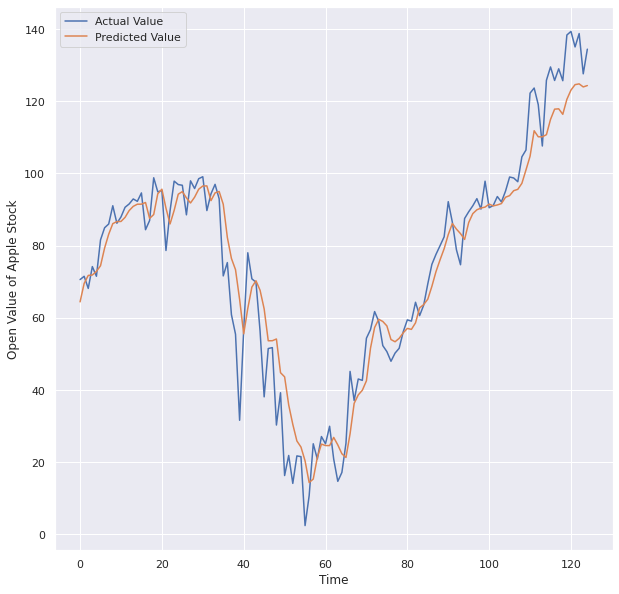

In [16]:
plt.figure( figsize=(15,10))
plt.plot(ytest)
plt.plot(ypred)
plt.legend(['Actual Value', 'Predicted Value'],loc='upper left')
plt.xlabel('Time')
plt.ylabel("Open Value of Apple Stock")
plt.show()

# Result show predicted values are very much close to actual value and capture the variation very good

In [17]:
# Lets check the RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,ypred)
np.sqrt(mse)

8.85830976395722